# MET Dataset Analysis

### 1. Loading library, dataset, and some EDA

In [491]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib.style as style

%matplotlib inline

In [492]:
met = pd.read_csv('MET.csv')

In [493]:
met.head()

,Object Number,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,1979.486.1,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
1,1980.264.5,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,67.265.9,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
3,67.265.10,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
4,67.265.11,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


In [494]:
met.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Is Timeline Work',
       'Object ID', 'Department', 'AccessionYear', 'Object Name', 'Title',
       'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role',
       'Artist Prefix', 'Artist Display Name', 'Artist Display Bio',
       'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Artist Gender',
       'Artist ULAN URL', 'Artist Wikidata URL', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Classification', 'Rights and Reproduction', 'Link Resource',
       'Object Wikidata URL', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL'],
      dtype='object')

In [495]:
met.shape

(474383, 51)

In [496]:
met.dtypes

Object Number               object
Is Highlight                  bool
Is Public Domain              bool
Is Timeline Work              bool
Object ID                    int64
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date                 object
Object Begin Date            int64
Object End Date     

In [497]:
print(met.isnull().sum())

Object Number                   0
Is Highlight                    0
Is Public Domain                0
Is Timeline Work                0
Object ID                       0
Department                      0
AccessionYear                4156
Object Name                  1936
Title                       29894
Culture                    268151
Period                     385000
Dynasty                    451247
Reign                      463207
Portfolio                  451135
Artist Role                204041
Artist Prefix              385163
Artist Display Name        201947
Artist Display Bio         241101
Artist Suffix              462431
Artist Alpha Sort          201981
Artist Nationality         291952
Artist Begin Date          238471
Artist End Date            238473
Artist Gender              373500
Artist ULAN URL            283449
Artist Wikidata URL        336874
Object Date                 14998
Object Begin Date               0
Object End Date                 0
Medium        

#### 1.2. Removing columns that are unnecessary

In [498]:
remove = ['Object Number', 'Artist Prefix', 'Portfolio', 'Artist Suffix', 
          'Artist ULAN URL', 'Artist Wikidata URL', 'Artist Alpha Sort', 
          'Geography Type', 'Excavation', 'River', 
          'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL', 
          'Metadata Date', 'Tags AAT URL']
met = met.drop(remove, axis=1)

In [499]:
blank = ['Period', 'Dynasty', 'Reign', 'Artist Display Bio', 'Artist Nationality', 'City', 'State', 'County', 'Country', 
         'Region', 'Subregion', 'Locale', 'Locus']
met = met.drop(blank, axis=1)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,Maker,...,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,"Metropolitan Museum of Art, New York, NY",NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,...,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,"Metropolitan Museum of Art, New York, NY",NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN


In [500]:
met.shape

(474383, 23)

#### 1.3 Check if there are duplicate rows

In [501]:
duplicate_rows_art = met[met.duplicated()]
print(met.duplicated())
print(duplicate_rows_art.shape)
# There's no duplicate rows

0         False
1         False
2         False
3         False
4         False
          ...  
474378    False
474379    False
474380    False
474381    False
474382    False
Length: 474383, dtype: bool
(0, 23)


#### 1.4 Exploring gender and other factors

In [502]:
gender_met = met.dropna(subset=["Artist Gender"])
gender_met.shape

(100883, 23)

In [503]:
gender_met["Artist Gender"].unique()

array(['|', '|Female', '||', '||||', 'Female|', 'Female', '|||',
       'Female|Female', '||Female', '|Female|Female', 'Female||',
       'Female|Female|Female|Female|Female||Female|Female||||||Female|Female|Female|Female|||Female|||Female|Female|',
       '|Female|', 'Female||Female', 'Female|Female|Female|',
       '||||||||||', '||||||||', '|||||||||||||||||||||||||||',
       'Female|Female|', 'Female|Female||', 'Female|||', '|Female||',
       '|Female||Female', '||Female|', '|Female|Female|Female',
       '|||Female', 'Female|Female|Female', '||||||', '|Female|||',
       '|||||', '||||Female|', '||||||||||||||||', '|||||||',
       '|||||||||||||', '|||||||||', '||||||||||||||||||||',
       'Female|||||||||||||||||||||||||||||Female||Female||||',
       'Female||||Female|||Female|||||||||||||||||Female|',
       '|Female||||||||||||||Female', '|||||||Female|||||',
       'Female||||Female|||||Female|||',
       '|||Female||Female||||||Female|||||Female|||', '||||Female',
      

In [504]:
gender_met = gender_met[(gender_met["Artist Gender"]=="Male") 
           | (gender_met["Artist Gender"]=="Female")]
gender_met.shape

(8459, 23)

In [505]:
gender_met["Artist Gender"].unique()

array(['Female'], dtype=object)

>it could be noted that among the artists, much of the gender information is missing, and among the exisiting information about gender, there are only Female or unknown "|"; thus not much information about gender's relation to artwork can be gathered 

#### 1.5 Data Visualization about the the amount of artwork each department attained throughout the years

In [506]:
met_data_mini = met[["Object ID", "Is Highlight", "Is Public Domain", "Is Timeline Work", "Department", "AccessionYear", "Culture", "Credit Line"]]
met_data_mini.head()

,Object ID,Is Highlight,Is Public Domain,Is Timeline Work,Department,AccessionYear,Culture,Credit Line
0,1,False,False,False,The American Wing,1979,NaN,"Gift of Heinz L. Stoppelmann, 1979"
1,2,False,False,False,The American Wing,1980,NaN,"Gift of Heinz L. Stoppelmann, 1980"
2,3,False,False,False,The American Wing,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"
3,4,False,False,False,The American Wing,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"
4,5,False,False,False,The American Wing,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"


In [507]:
met_data_mini = met_data_mini.dropna()
met_data_mini.shape

(204870, 8)

In [508]:
met_data_mini = met_data_mini.astype({"AccessionYear": int})
met_data_mini["AccessionYear"].unique()

array([1916, 1909, 1964, 1970, 1904, 1976, 1938, 1918, 1946, 1960, 1923,
       1936, 1949, 1984, 1989, 1941, 1985, 1930, 1952, 1971, 1968, 1919,
       1978, 1972, 1924, 1910, 1950, 1925, 1926, 1931, 1932, 1934, 1939,
       1947, 1948, 1951, 1953, 2006, 1969, 1975, 1981, 1986, 1959, 1944,
       1979, 1982, 1945, 1888, 1911, 1957, 1980, 1943, 1917, 1973, 1937,
       1940, 1913, 1962, 1983, 1914, 1966, 1954, 1920, 1933, 1967, 2014,
       1928, 1901, 1958, 1965, 1883, 1935, 1987, 1974, 1977, 1915, 1942,
       1912, 1922, 1927, 1896, 1892, 1877, 1906, 1961, 1994, 1907, 1929,
       2018, 1908, 1921, 1963, 2010, 2000, 1988, 1955, 1956, 2012, 2013,
       2002, 1999, 1894, 1897, 1993, 1893, 1992, 1996, 1898, 1899, 1991,
       1880, 1876, 1886, 1895, 1997, 2019, 1990, 1891, 1881, 1890, 1903,
       1900, 1905, 1995, 1902, 1887, 2011, 1874, 1885, 1873, 1884, 1882,
       1875, 1872, 2001, 1889, 2008, 2007, 2015, 1998, 2003, 2005, 2016,
       2004, 2017, 2009, 1879, 2020, 1870])

In [509]:
met_data_sorted = met_data_mini.sort_values(by=["AccessionYear"], ascending=True)
met_data_sorted.head()

,Object ID,Is Highlight,Is Public Domain,Is Timeline Work,Department,AccessionYear,Culture,Credit Line
138900,239584,True,True,True,Greek and Roman Art,1870,Roman,"Gift of Abdo Debbas, 1870"
97157,185835,False,False,True,European Sculpture and Decorative Arts,1872,"German, Munich","Gift of Griffith Rowe, 1872"
118190,208578,False,True,True,European Sculpture and Decorative Arts,1872,French,"Gift of John Bard, 1872"
10799,11790,True,True,True,The American Wing,1872,American,"Gift of William Backhouse Astor, 1872"
97187,185865,False,False,True,European Sculpture and Decorative Arts,1873,"British, after Italian, Venice original","Purchase, 1873"


In [510]:
met_data_sorted.shape

(204870, 8)

In [511]:
met_data_sorted["Department"].unique()

array(['Greek and Roman Art', 'European Sculpture and Decorative Arts',
       'The American Wing', 'Medieval Art', 'Ancient Near Eastern Art',
       'Asian Art', 'Arts of Africa, Oceania, and the Americas',
       'Costume Institute', 'Arms and Armor', 'Musical Instruments',
       'The Cloisters', 'Modern and Contemporary Art',
       'Robert Lehman Collection'], dtype=object)

In [512]:
met_mini_data = met_data_sorted[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data.head()

,AccessionYear,Object ID
0,1870,1
1,1872,3
2,1873,65
3,1874,4731
4,1875,47


In [513]:
met_mini_data = met_mini_data.rename(columns={"Object ID": "Object Number"})

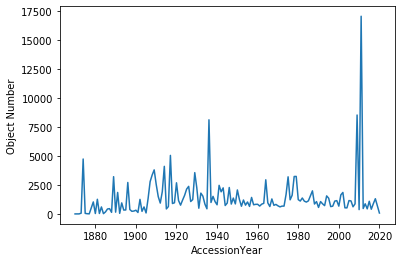

In [514]:
# a lineplot of the artwork accession pattern throughout the years
lp = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data)

In [515]:
# in the following steps I select some interesting pattern of accession and number correlation in several departments

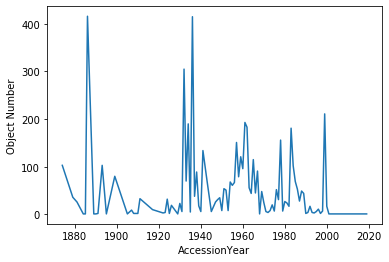

In [517]:
# Ancient Near Eastern Art Department
met_near_eastern = met_data_mini[met_data_mini["Department"] == "Ancient Near Eastern Art"].sort_values(by=["AccessionYear"], ascending=True)
met_mini_data2 = met_near_eastern[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data2 = met_mini_data2.rename(columns={"Object ID": "Object Number"})
lp2 = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data2)

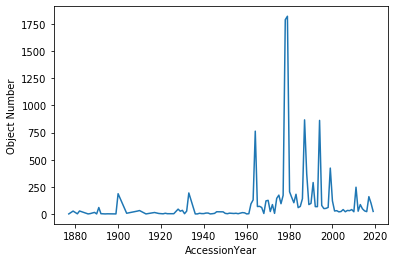

In [518]:
# Arts of Africa, Ocenia, and the Americas
met_AOA = met_data_mini[met_data_mini["Department"] == "Arts of Africa, Oceania, and the Americas"].sort_values(by=["AccessionYear"], ascending=True)
met_mini_data3 = met_AOA[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data3 = met_mini_data3.rename(columns={"Object ID": "Object Number"})
lp3 = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data3)

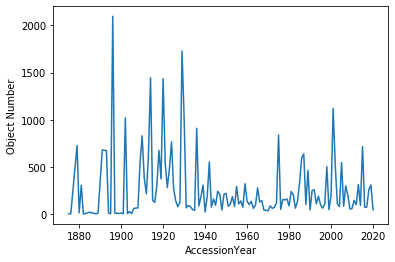

In [519]:
# Asian Art
met_Asian = met_data_mini[met_data_mini["Department"] == "Asian Art"].sort_values(by=["AccessionYear"], ascending=True)
met_mini_data4 = met_Asian[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data4 = met_mini_data4.rename(columns={"Object ID": "Object Number"})
lp4 = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data4)

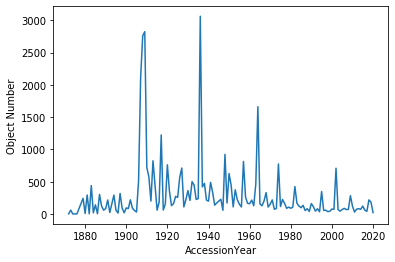

In [520]:
# European Sculpture and decorative art
met_European = met_data_mini[met_data_mini["Department"] == "European Sculpture and Decorative Arts"].sort_values(by=["AccessionYear"], ascending=True)
met_mini_data5 = met_European[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data5 = met_mini_data5.rename(columns={"Object ID": "Object Number"})
lp5 = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data5)

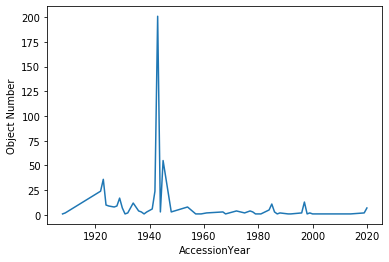

In [521]:
# Modern and Contemporary Art
met_modern = met_data_mini[met_data_mini["Department"] == "Modern and Contemporary Art"].sort_values(by=["AccessionYear"], ascending=True)
met_mini_data6 = met_modern[["AccessionYear", "Object ID"]].groupby("AccessionYear", as_index=False).count()
met_mini_data6 = met_mini_data6.rename(columns={"Object ID": "Object Number"})
lp6 = sns.lineplot(x="AccessionYear", y="Object Number", data=met_mini_data6)

### 2. Hypothesis Testing

>Null Hypothesis: There is no significant difference between cultures in terms of number of works considered to be a highlight

In [522]:
highlights = met[met['Is Highlight']==True]
highlights.isnull().mean()

Is Highlight           0.000000
Is Public Domain       0.000000
Is Timeline Work       0.000000
Object ID              0.000000
Department             0.000000
AccessionYear          0.128984
Object Name            0.141434
Title                  0.011952
Culture                0.495020
Artist Role            0.384960
Artist Display Name    0.374004
Artist Begin Date      0.422809
Artist End Date        0.423307
Artist Gender          0.821215
Object Date            0.002490
Object Begin Date      0.000000
Object End Date        0.000000
Medium                 0.114542
Dimensions             0.051295
Credit Line            0.054283
Classification         0.211155
Repository             0.000000
Tags                   0.267928
dtype: float64

In [523]:
highlights = highlights.dropna(subset=['Culture'])
commas = [c.split(',')[0] if ',' in c else c for c in highlights.Culture]

In [524]:
highlights['Culture'] = commas
highlights.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
167,True,True,True,200,The American Wing,1951,Armchair,Spindle-back armchair,American,NaN,...,NaN,1640–80,1640,1680,Ash,44 3/4 x 23 1/2 x 15 3/4 in. (113.7 x 59.7 x 4...,"Gift of Mrs. J. Insley Blair, 1951",Furniture,"Metropolitan Museum of Art, New York, NY",NaN
201,True,True,True,237,The American Wing,1970,Armchair,Armchair,American,Maker,...,NaN,ca. 1870–75,1867,1875,"Rosewood, prickly juniper veneer",37 x 27 1/2 x 27 1/2 in. (94 x 69.9 x 69.9 cm),"Funds from various donors, 1970",Furniture,"Metropolitan Museum of Art, New York, NY",Sphinx
241,True,True,False,282,The American Wing,1925,Window,Autumn Landscape,American,Maker|Designer,...,|Female,1923–24,1923,1924,Leaded Favrile glass,132 x 102 in. (335.3 x 259.1 cm),"Gift of Robert W. de Forest, 1925",Glass,"Metropolitan Museum of Art, New York, NY",Windows|Waterfalls|Landscapes|Autumn
317,True,True,True,364,The American Wing,1954,Basket,Basket,American,Maker,...,NaN,1770–76,1770,1776,Silver,11 3/16 x 14 7/16 x 11 3/8 in. (28.4 x 36.7 x ...,"Morris K. Jesup Fund, 1954",Silver,"Metropolitan Museum of Art, New York, NY",NaN
611,True,True,True,674,The American Wing,1912,Basin,Basin,Mexican,Artist,...,NaN,ca. 1650,1647,1650,Tin-glazed earthenware,Diam. 20 3/4 in. (52.7 cm),"Gift of Mrs. Robert W. de Forest, 1912",Ceramics,"Metropolitan Museum of Art, New York, NY",Flowers|Basins


In [525]:
na = ['Native American' if ('Native' in c) else c for c in highlights.Culture]
highlights['Culture'] = na

paren = [c.split('(')[0] if ('(' in c) else c for c in highlights.Culture]
highlights['Culture'] = paren

ors = [c.split(' or ')[0] if ' or ' in c else c for c in highlights.Culture]
highlights['Culture'] = ors

df = highlights.groupby(by='Culture', as_index=False)[['Object ID']].count().sort_values(by='Object ID', ascending=False)

In [526]:
df

,Culture,Object ID
7,American,197
71,French,145
75,Greek,63
74,German,56
94,Italian,53
...,...,...
104,Korean,1
105,Kushan,1
106,Kwele peoples,1
107,Lambayeque,1


In [527]:
highlights['Culture'].unique()

array(['American', 'Mexican', 'Colombian; Popayán', 'German', 'Italian',
       'French', 'Japanese', 'grip', 'British', 'Western European',
       'Turkish', 'Colonial American', 'Byzantine', 'European', 'hilt',
       'Spanish', 'Indian', 'Russian', 'Korea', 'China', 'Japan',
       'Indonesia ', 'India', 'Eastern Tibet', 'India ',
       'Southern Cambodia', 'Nepal', 'Pakistan ', 'Cambodia ',
       'Eastern Central Asia', 'Central Asia', 'Western India',
       'Sri Lanka ', 'Afghan', 'probably French', 'Swiss', 'Austrian',
       'probably Austrian', 'Dutch', 'Netherlandish', 'Polish', 'Roman',
       'Cypriot', 'Etruscan', 'Greek', 'Minoan', 'East Greek', 'Cycladic',
       'Helladic', 'Northwest Anatolian', 'Moche', 'Aztec', 'Nasca-Wari',
       'Eastern Nahua', 'New Georgia Island ', 'Lambayeque ',
       'Solomon Islands', "Hawai'i", 'Olmec', 'Dogon peoples', 'Maya',
       'Songye peoples', 'Belauan', 'Tiwanaku', 'Nasca', 'Ixtlán del Río',
       'Tembladera', 'Fang peoples',

In [528]:
# making categories:
near_east = ['Halaf', 'Sumerian', 'Proto-Elamite', 'Hattian', 'Northwest Anatolian', 'Akkadian',
              'Hurrian', 'Neo-Sumerian', 'Old Assyrian Trading Colony', 'Babylonian', 'Elamite', 'Hittite', 
              'Canaanite', 'Assyrian', 'Iran', 'Israelite', 'Urartian', 'Cypriot', 'Achaemenid', 'Parthian', 'Nabataean',
            'Pakistan', 'Sasanian', 'Turkish', 'Iranian ', 'Afghan']

western = ['Cycladic', 'Minoan', 'Helladic', 'Greek', 'Etruscan', 'Celtic', 'East Greek', 'Roman',
          'Byzantine', 'East Germanic', 'Frankish', 'Late Roman', 'Anglo-Saxon', 'Alanic', 'North Italian',
          'Carolingian', 'European', 'Ottonian', 'Central Italian', 'South Italian', 'French', 'Spanish',
          'Catalan', 'British', 'South Netherlandish', 'German', 'Italian', 'North French ', 'Western European',
          'Austrian', 'Bohemian', 'Upper Rhenish', 'Netherlandish', 'French ', 'South German', 'Venetian',
          'Flemish', 'Italian ', 'Façon de Venise', 'probably Austrian', 'American', 'Polish', 'Swiss',
          'Dutch', 'probably French', 'Russian', 'Colonial American', 'Hanoverian ', 'Norwegian', 'Belgian', 
           'Southern New Ireland', "Yup'ik"]

american = ['Valdivia', 'Olmec', 'Tembladera', 'Paracas', 'Tolita-Tumaco', 'Ixtlán del Río', 'Quimbaya', 
                 'Moche', 'Nasca', 'Teotihuacan', 'Maya', 'Wari', 'Tiwanaku', 'Mayan', 'Moche-Wari',
                 'Remojadas', 'Lambayeque', 'Nasca-Wari', 'Taíno', 'Chiriquí', 'Eastern Nahua', 'Chuquibamba', 
                 'Aztec', 'Sapi-Portuguese', 'Mexican', 'Colombian; Popayán', 'Native American', 'Osage', 'Javanese ',
           'Minneconjou Lakota/ Teton Sioux', 'San Ildefonso']

asian = ['Indus', 'Bactria-Margiana Archaeological Complex', 'China', 'Scythian', 'Indonesia', 'India', 'Kushan',
        'Japanese', 'India ', 'Korea', 'Southern Cambodia', 'Sri Lanka', 'Cambodia ', 'Eastern Central Asia', 'Japan', 
        'Nepal', 'Central Asia', 'Tibetan', 'Eastern Tibet', 'Chinese', 'Indian', 'Lampung', 'probably Chinese',
        'Yami people', 'Nage', 'Sentani people', 'Toba Batak people', 'Thai', 'Burmese', 'Philippine ', 'Western India',
        'Korean']

pacific = ['Morobe province', "Hawai'i", "Maohi ", 'Mangarevan people', "Ha'apai Islands", 'Maori people', 
           'Sawos people', 'Belauan', 'New Georgia Island ', 'Solomon Islands', 'Yessan-Mayo people', 'Bougainville',
          'Torres Strait Islander', 'Kerewa people', 'Abelam people', 'Ngadju', 'Rapa Nui people', 'Caroline Islands',
          'Cenderawasih Bay', 'Sulka people', 'Elema people', 'Southwest Malakula', 'Asmat people', 
          'Siane']
           
africa = ['Middle Niger civilization', 'Dogon peoples', 'Amhara peoples', 'Bamana peoples', 'Tigrinya peoples',
         'Edo peoples', 'Sakalava peoples', 'Yoruba peoples', 'Akan peoples', 'Punu peoples', 'Bamum kingdom', 
         'Chokwe peoples', 'Kongo peoples', 'Baule peoples', 'Mossi peoples', 'Ejagham peoples', 'Fang peoples', 
          'Luba', 'Songye peoples', 'Kwele peoples', 'Senufo peoples', 'Kambot people', 'Benin', 'Mandinka people',
         'Ganda people', 'Mangbetu', 'Possibly Barwe People', 'Dan peoples', 'Akan Ashanti people', 'Ekonda people ']

lst = [near_east, western, american, asian, pacific, africa]


In [529]:
near_east_sum = df[df['Culture'].isin(near_east)]["Object ID"].sum()
for culture in lst:
    print(df[df['Culture'].isin(culture)]["Object ID"].sum())

66
688
49
100
25
41


In [530]:
highlights_by_culture = pd.DataFrame([
    ["Near Eastern", 66], ["Western", 687], ["American", 49], ["Asian", 100], ["Pacific", 25], ["Africa", 41]], 
    columns = ["Culture_circle", "Highlight_Numbers"])
highlights_by_culture

,Culture_circle,Highlight_Numbers
0,Near Eastern,66
1,Western,687
2,American,49
3,Asian,100
4,Pacific,25
5,Africa,41


In [531]:
# non-highlights
nonhighlights = met[met['Is Highlight']==False]
nonhighlights = nonhighlights.dropna(subset=['Culture'])
commas = [c.split(',')[0] if ',' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = commas
na = ['Native American' if ('Native' in c) else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = na

In [532]:
paren = [c.split('(')[0] if ('(' in c) else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = paren

ors = [c.split(' or ')[0] if ' or ' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = ors

question = [c.split('?')[0].rstrip() if '?' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = question

possibly = [c.replace('possibly', '').strip() if 'ossibly' in c else c for c in nonhighlights.Culture]
possibly = [c.replace('Possibly', '').strip() if 'Possibly' in c else c for c in possibly]
nonhighlights['Culture'] = possibly

slash = [c.split('/')[0] if '/' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = slash

semicolon = [c.split(';')[0] if ';' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = semicolon

probably = [c[9:] if 'robably' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = probably

data = nonhighlights.groupby(by='Culture', as_index=False)[['Object ID']].count().sort_values(by='Object ID', ascending=False)

In [533]:
data

,Culture,Object ID
55,American,30762
674,French,23911
733,Greek,20720
911,Japan,16669
403,China,13471
...,...,...
1067,Liberian,1
1065,Liberia,1
1063,Levantine,1
1060,Leti,1


In [534]:
for culture in lst:
    print(data[data['Culture'].isin(culture)]["Object ID"].sum())

7443
128004
2747
42784
819
1102


In [535]:
highlights_by_culture['Non_Highlights'] = [data[data['Culture'].isin(culture)]["Object ID"].sum() for culture in lst]

In [536]:
highlights_by_culture

,Culture_circle,Highlight_Numbers,Non_Highlights
0,Near Eastern,66,7443
1,Western,687,128004
2,American,49,2747
3,Asian,100,42784
4,Pacific,25,819
5,Africa,41,1102


In [537]:
from scipy.stats import chi2_contingency
to_test = highlights_by_culture.set_index('Culture_circle')
chi2, p, ddof, expected_results = chi2_contingency(to_test)
msg = "T-Statistic: {}\nP-Value: {}\nDegrees of Freedom: {}\n"
print(msg.format(chi2, p, ddof))
print("Expected Results")
print(expected_results)

T-Statistic: 468.6850797396923
P-Value: 4.573465950706996e-99
Degrees of Freedom: 5

Expected Results
[[3.95324446e+01 7.46946756e+03]
 [6.77516292e+02 1.28013484e+05]
 [1.47200313e+01 2.78127997e+03]
 [2.25770323e+02 4.26582297e+04]
 [4.44338571e+00 8.39556614e+02]
 [6.01752354e+00 1.13698248e+03]]


In [538]:
highlights_by_culture['Percent_of_Highlights'] = highlights_by_culture['Highlight_Numbers']*100/highlights_by_culture['Highlight_Numbers'].sum()
highlights_by_culture['Percent_of_NonHighlights'] = highlights_by_culture['Non_Highlights']*100/highlights_by_culture['Non_Highlights'].sum()
highlights_by_culture

,Culture_circle,Highlight_Numbers,Non_Highlights,Percent_of_Highlights,Percent_of_NonHighlights
0,Near Eastern,66,7443,6.818182,4.069459
1,Western,687,128004,70.971074,69.986167
2,American,49,2747,5.061983,1.501922
3,Asian,100,42784,10.330579,23.392145
4,Pacific,25,819,2.582645,0.447788
5,Africa,41,1102,4.235537,0.602518


>Conclusion: The P-Value is much lower than 0.5, so we can conclude that there is a significant difference between cultures in terms of number of works considered to be a highlight. (There is a cultural difference in terms of what is considered a highlight)

In [539]:
# Some visualization

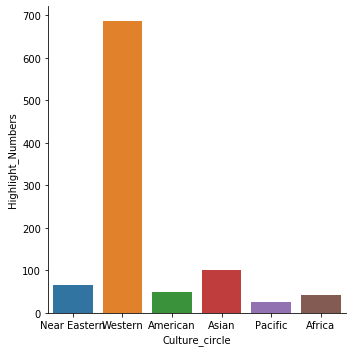

In [540]:
sns.catplot(x='Culture_circle', y='Highlight_Numbers', data=highlights_by_culture, kind='bar')

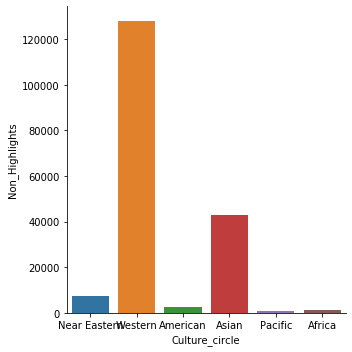

In [541]:
sns.catplot(x='Culture_circle', y='Non_Highlights', data=highlights_by_culture, kind='bar')

### 3. Machine Learning Model

> Build a machine learning model that predicts whether an artwork is a timeline work (with historical significance) using logistic regression and randomized search

In [542]:
met = met[met["Object Begin Date"].notnull() 
          & ((met["Object Begin Date"] != 0) 
             | (met["Object End Date"] != 0)) 
          & ((met["Object Begin Date"] <= 2020) 
             | (met["Object End Date"] <= 2020))].sort_values(by="Object Begin Date", ascending=True)

In [543]:
met.shape

(473263, 23)

In [544]:
met.columns

Index(['Is Highlight', 'Is Public Domain', 'Is Timeline Work', 'Object ID',
       'Department', 'AccessionYear', 'Object Name', 'Title', 'Culture',
       'Artist Role', 'Artist Display Name', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Classification', 'Repository', 'Tags'],
      dtype='object')

In [545]:
met_data = met[["Is Highlight", "Is Public Domain", "Is Timeline Work", "Department", "AccessionYear", "Culture", "Credit Line"]]

In [546]:
met_data.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Department,AccessionYear,Culture,Credit Line
363928,False,False,True,Egyptian Art,1906,NaN,"Gift of C. T. Currelly, 1906"
363920,False,False,True,Egyptian Art,1906,NaN,"Gift of C. T. Currelly, 1906"
470109,False,False,True,Arms and Armor,1999,Acheulean,"Purchase, Friends of Arms and Armor Gifts, 2019"
363916,False,False,True,Egyptian Art,1906,NaN,"Gift of C. T. Currelly, 1906"
363918,False,False,True,Egyptian Art,1906,NaN,"Gift of C. T. Currelly, 1906"


In [547]:
met_data = met_data.dropna()

In [548]:
met_data.shape

(204365, 7)

In [549]:
met_data = met_data.astype({"AccessionYear": int})
met_data["AccessionYear"].unique()

array([1999, 1912, 2015, 1953, 1908, 1994, 1950, 1924, 1917, 1874, 1911,
       1913, 1949, 1881, 1895, 1889, 1907, 1898, 1900, 1904, 1905, 1906,
       1896, 1967, 1897, 1964, 1910, 1941, 1909, 1926, 1920, 1923, 1929,
       1928, 1922, 1925, 1984, 1930, 1962, 1892, 1963, 1986, 1988, 1985,
       1983, 1948, 2011, 1938, 1976, 2013, 2004, 1972, 1978, 1951, 1956,
       1921, 2001, 1959, 1973, 1894, 1957, 1939, 1952, 1946, 2003, 1992,
       1987, 1989, 1975, 2009, 2002, 1958, 1945, 1995, 1979, 1947, 1996,
       1966, 1955, 1980, 1935, 1993, 2007, 1914, 1940, 1997, 1934, 2005,
       1932, 1960, 1977, 1969, 1927, 1943, 1954, 1968, 1974, 1933, 1918,
       1991, 2008, 1970, 1886, 1971, 1981, 1982, 1965, 2010, 1899, 1942,
       1961, 1998, 1902, 1936, 1893, 1937, 2014, 2000, 2018, 1990, 2019,
       2006, 1931, 1891, 1890, 2017, 1916, 1875, 1884, 1919, 1944, 2016,
       1915, 1903, 1901, 1876, 1885, 1879, 2012, 1888, 1882, 1870, 1877,
       1887, 1873, 2020, 1883, 1880, 1872])

In [550]:
met_data.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Department,AccessionYear,Culture,Credit Line
470109,False,False,True,Arms and Armor,1999,Acheulean,"Purchase, Friends of Arms and Armor Gifts, 2019"
17570,False,False,False,Arms and Armor,1912,Japanese,"Rogers Fund, 1912"
17569,False,False,False,Arms and Armor,1912,Japanese,"Rogers Fund, 1912\r\n"
45669,False,False,True,Asian Art,2015,Japan,"Mary Griggs Burke Collection, Gift of the Mary..."
198722,False,False,True,Ancient Near Eastern Art,1953,Natufian,"Gift of H. Dunscombe Colt, 1953"


In [551]:
met_data[["Is Highlight", "Is Public Domain", "Is Timeline Work"]] = met_data[["Is Highlight", "Is Public Domain", "Is Timeline Work"]] * 1

In [552]:
met_data.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Department,AccessionYear,Culture,Credit Line
470109,0,0,1,Arms and Armor,1999,Acheulean,"Purchase, Friends of Arms and Armor Gifts, 2019"
17570,0,0,0,Arms and Armor,1912,Japanese,"Rogers Fund, 1912"
17569,0,0,0,Arms and Armor,1912,Japanese,"Rogers Fund, 1912\r\n"
45669,0,0,1,Asian Art,2015,Japan,"Mary Griggs Burke Collection, Gift of the Mary..."
198722,0,0,1,Ancient Near Eastern Art,1953,Natufian,"Gift of H. Dunscombe Colt, 1953"


In [553]:
department_dummy = pd.get_dummies(met_data["Department"], drop_first=True)

In [554]:
department_dummy.head()

,Arms and Armor,"Arts of Africa, Oceania, and the Americas",Asian Art,Costume Institute,European Sculpture and Decorative Arts,Greek and Roman Art,Medieval Art,Modern and Contemporary Art,Musical Instruments,Robert Lehman Collection,The American Wing,The Cloisters
470109,1,0,0,0,0,0,0,0,0,0,0,0
17570,1,0,0,0,0,0,0,0,0,0,0,0
17569,1,0,0,0,0,0,0,0,0,0,0,0
45669,0,0,1,0,0,0,0,0,0,0,0,0
198722,0,0,0,0,0,0,0,0,0,0,0,0


In [555]:
met_data["Culture"].unique()

array(['Acheulean', 'Japanese', 'Japan', ..., 'Dominican Republic',
       'Taiwan', 'Afro-Ecuadorian'], dtype=object)

In [556]:
met_test = met_data[met_data['Culture'].isin(culture)]

In [557]:
culture_dummy = pd.get_dummies(met_test["Culture"], drop_first=True)
culture_dummy.head()

,Akan peoples,Amhara peoples,Bamana peoples,Bamum kingdom,Baule peoples,Benin,Chokwe peoples,Dan peoples,Dogon peoples,Edo peoples,...,Mangbetu,Middle Niger civilization,Mossi peoples,Possibly Barwe People,Punu peoples,Sakalava peoples,Senufo peoples,Songye peoples,Tigrinya peoples,Yoruba peoples
447927,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194945,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194946,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194947,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194949,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [558]:
combined = pd.concat([
    met_data.reset_index(drop=True),
    department_dummy.reset_index(drop=True),
    culture_dummy.reset_index(drop=True)
], axis=1)

combined = combined.drop(['Department', 'Culture', 'Credit Line'], axis=1)
combined = combined.dropna()
combined.head()

,Is Highlight,Is Public Domain,Is Timeline Work,AccessionYear,Arms and Armor,"Arts of Africa, Oceania, and the Americas",Asian Art,Costume Institute,European Sculpture and Decorative Arts,Greek and Roman Art,...,Mangbetu,Middle Niger civilization,Mossi peoples,Possibly Barwe People,Punu peoples,Sakalava peoples,Senufo peoples,Songye peoples,Tigrinya peoples,Yoruba peoples
0,0,0,1,1999,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1912,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1912,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,2015,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,1953,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [559]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = "Is Timeline Work"
X = combined.drop(columns=y).columns

In [560]:
X_train, X_test, y_train, y_test = train_test_split(combined[X],combined[y],test_size=0.2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test ',y_test.shape)

X_train:  (774, 43)
X_test:  (194, 43)
y_train:  (774,)
y_test  (194,)


In [561]:
# some hyperparameter tuning to get best model
clf = LogisticRegression()

search_parameters_space = {
    "penalty": ["l1", "l2"], 
    "C": np.linspace(0.1, 2, 10), 
    "fit_intercept": [True, False], 
}

In [562]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [563]:
grid = GridSearchCV(estimator=clf, 
                    param_grid=search_parameters_space,
                    scoring="roc_auc",
                    n_jobs=-1)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [564]:
%%time
grid.fit(X_train, y_train)

CPU times: user 410 ms, sys: 29.5 ms, total: 439 ms
Wall time: 2.66 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [565]:
print(grid.best_score_)

0.7868306640241399


In [566]:
grid.best_params_

{'C': 1.577777777777778, 'fit_intercept': True, 'penalty': 'l2'}

In [567]:
RESULTS = {}
from sklearn.model_selection import cross_validate

#this is the same funxtion we defined last week. It runs cross validation on whichever estimator/model family we specify
def evaluate_model(estimator, X, y):  #define the function evaluate_model with input arguments of (estimator, X, y)
    cv_results = cross_validate(estimator, X, y,  
                     scoring="roc_auc",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).mean().to_dict()

In [568]:
RESULTS["logistic_gridsearch"] = evaluate_model(grid.best_estimator_,
                                             X_test, y_test)

In [569]:
RESULTS

{'logistic_gridsearch': {'fit_time': 0.037535667419433594,
  'score_time': 0.004465341567993164,
  'test_score': 0.754453514739229,
  'train_score': 0.8694169472502806}}

In [570]:
# tuning using randomized search
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 

param_dist_random = {
    "penalty": ["l1", "l2"],
    "C": uniform(loc=0.1, scale=2),
    "fit_intercept": [True, False],
    "class_weight":["balanced", None],
}

In [571]:
random_search = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_dist_random,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [572]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 710 ms, sys: 33 ms, total: 743 ms
Wall time: 3.35 s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1b0bc55790>,
                                        'class_weight': ['balanced', None],
                                        'fit_intercept': [True, False],
                 

In [573]:
random_search.best_score_

0.7891580516721124

In [574]:
RESULTS["logistic_randomizedsearch"] = evaluate_model(
    random_search.best_estimator_,
    X_test, y_test
)

In [575]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
logistic_gridsearch,0.037536,0.004465,0.754454,0.869417
logistic_randomizedsearch,0.035117,0.015252,0.765601,0.856774


>Thus we can see that randomized search performs a little better than grid search

In [576]:
# some other measurements
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [577]:
predictions_probabilities = clf.predict_proba(X_test)
predictions_probabilities[:10]

array([[0.10562939, 0.89437061],
       [0.04727424, 0.95272576],
       [0.0345316 , 0.9654684 ],
       [0.16526553, 0.83473447],
       [0.11997895, 0.88002105],
       [0.20339041, 0.79660959],
       [0.51804602, 0.48195398],
       [0.03875335, 0.96124665],
       [0.15076291, 0.84923709],
       [0.04632094, 0.95367906]])

In [578]:
probs_df = pd.DataFrame(predictions_probabilities)
probs_df = round(probs_df, 2)
probs_df.head()

,0,1
0,0.11,0.89
1,0.05,0.95
2,0.03,0.97
3,0.17,0.83
4,0.12,0.88


In [579]:
X = X_test.reset_index().copy()
X["target"] = y_test.tolist()
X["prediction"] = predictions
X = pd.concat([X, probs_df], axis=1)
X[["target", "prediction", 0, 1]].head(20)

,target,prediction,0,1
0,1,1,0.11,0.89
1,1,1,0.05,0.95
2,1,1,0.03,0.97
3,0,1,0.17,0.83
4,1,1,0.12,0.88
5,1,1,0.20,0.80
6,1,0,0.52,0.48
7,1,1,0.04,0.96
8,1,1,0.15,0.85
9,1,1,0.05,0.95


In [580]:
true_classes = y_test

In [581]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[ 21,  24],
       [  8, 141]])

In [582]:
# Accuracy
from sklearn import metrics
metrics.accuracy_score(true_classes, predictions)

0.8350515463917526

In [583]:
# Precision
metrics.precision_score(true_classes, predictions)

0.8545454545454545

In [584]:
# Recall
metrics.recall_score(true_classes, predictions)

0.9463087248322147

In [585]:
# F1 score
metrics.f1_score(true_classes, predictions)

0.8980891719745222